### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [110]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [111]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [112]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных
data.isna().sum()
### Your code is here

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [113]:
data['passenger_count'].fillna(930354, inplace=True)

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [114]:
category_columns = ['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']
c_means = data.groupby(category_columns)['distance_km'].mean()
data = pd.merge(data, c_means, on=['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], suffixes=('', '_mean'))
data['distance_km'].fillna(data['distance_km_mean'], inplace = True)

In [115]:
data.isna().sum()
data.drop('distance_km_mean', axis = 1, inplace=True)

In [116]:
data.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'distance_km',
       'log_trip_duration', 'anomaly', 'traffic_jam', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [117]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X, y = data.drop('log_trip_duration', axis = 1), data['log_trip_duration']

cv = cross_validate(model, X, y, cv=selector, return_train_score=True)

cross_val_error = np.mean(cv['train_score'])

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.323


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

{'whiskers': [<matplotlib.lines.Line2D at 0x2019d420d10>,
 'caps': [<matplotlib.lines.Line2D at 0x201ad4a0810>,
 'boxes': [<matplotlib.lines.Line2D at 0x2019d422d50>],
 'medians': [<matplotlib.lines.Line2D at 0x201a92ebdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x201ad4a1650>],
 'means': []}

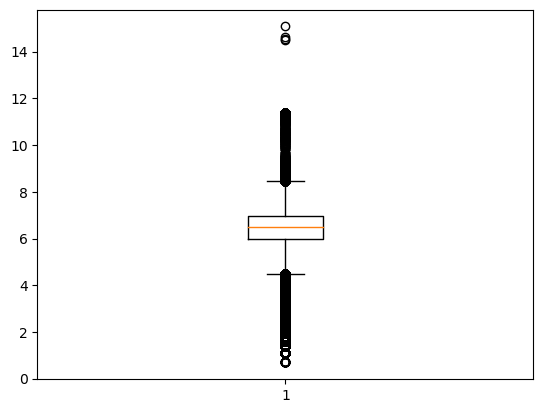

In [118]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.boxplot(y)



Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [119]:
top = np.percentile(y, 99.5)
bottom = np.percentile(y, 0.5)
print(top, bottom)
data = data[(data['log_trip_duration'] > bottom) & (data['log_trip_duration'] < top)]

8.32845106681936 3.9318256327243257


{'whiskers': [<matplotlib.lines.Line2D at 0x201aff37110>,
 'caps': [<matplotlib.lines.Line2D at 0x201aff44290>,
 'boxes': [<matplotlib.lines.Line2D at 0x201af8e7f90>],
 'medians': [<matplotlib.lines.Line2D at 0x201aff45590>],
 'fliers': [<matplotlib.lines.Line2D at 0x201aff45e50>],
 'means': []}

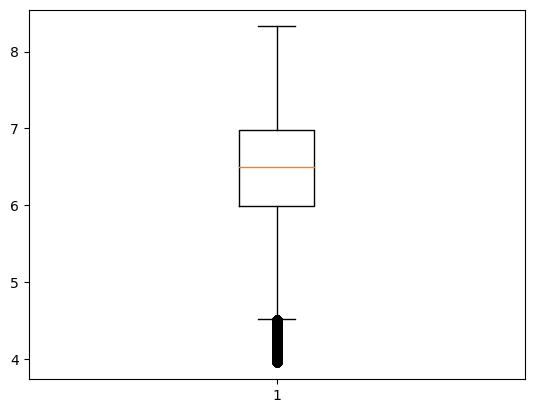

In [123]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.boxplot(y)


In [120]:
X, y = data.drop('log_trip_duration', axis = 1), data['log_trip_duration']

Снова замерьте качество на кросс-валидации, используя старый selector

In [121]:
model = LinearRegression()
cv = cross_validate(model, X, y, cv = selector, return_train_score=True)

In [122]:
print(round(np.mean(cv['train_score']), 3))

0.35
